In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Buil X and Y

In [2]:
# build X and Y from dfAll
dfAll = pd.read_csv('All.csv',index_col=0)
df_ohc = pd.get_dummies(dfAll,columns=['events','day_of_week'])
df_ohc.head()

,date,trip_num,trip_dur,trip_dur_avg,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,...,events_Rain,events_Rain-Thunderstorm,events_rain,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2013-08-29,742,760268,1024.619946,68.0,58.0,75.0,30.02,10.0,11.0,...,0,0,0,0,0,0,0,1,0,0
1,2013-08-30,713,1789207,2509.406732,69.0,58.0,70.0,30.00,10.0,13.0,...,0,0,0,1,0,0,0,0,0,0
2,2013-08-31,638,1986155,3113.095611,64.0,56.0,75.0,29.96,10.0,15.0,...,0,0,0,0,0,1,0,0,0,0
4,2013-09-01,705,2336253,3313.834043,66.0,56.0,68.0,29.93,10.0,13.0,...,0,0,0,0,0,0,1,0,0,0
3,2013-09-02,658,2051061,3117.113982,69.0,60.0,77.0,29.94,10.0,12.0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
X = np.array(df_ohc.iloc[:,4:])
Y = np.array(df_ohc[['trip_num','trip_dur_avg']])

In [4]:
from sklearn.model_selection import train_test_split
Xtr, Xts, Ytr, Yts = train_test_split(X, Y, train_size=500)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
Xtr_m = np.mean(Xtr[:,:7],axis=0)
Xtr_std = np.std(Xtr[:,:7],axis=0)
Xtr_scale = (Xtr[:,:7]-Xtr_m)/Xtr_std
Xts_scale = (Xts[:,:7]-Xtr_m)/Xtr_std

In [6]:
Ytr_m = np.mean(Ytr[:,:7],axis=0)
Ytr_std = np.std(Ytr[:,:7],axis=0)
Ytr_scale = (Ytr[:,:7]-Ytr_m)/Ytr_std
Yts_scale = (Yts[:,:7]-Ytr_m)/Ytr_std

In [7]:
Xtr_scale = np.hstack((Xtr_scale,Xtr[:,7:]))
Xts_scale = np.hstack((Xts_scale,Xts[:,7:]))

In [8]:
nfea = Xtr_scale.shape[1]

# Train a 2 layers neural network

In [9]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K

Using TensorFlow backend.


In [10]:
K.clear_session()
nh = 50
model = Sequential()
model.add(Dense(nh,input_shape=(nfea,),name='hidden'))
model.add(Dense(2,name='output'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 50)                1000      
_________________________________________________________________
output (Dense)               (None, 2)                 102       
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras import optimizers
opt = optimizers.Adam()
model.compile(optimizer=opt,
                loss='mse',
                metrics=['accuracy'])

In [12]:
hist = model.fit(Xtr_scale, Ytr_scale, epochs=20, 
                 validation_data=(Xts_scale,Yts_scale),
                 verbose=0)

In [13]:
print('acc =',hist.history['acc'][-1])
print('val_acc =',hist.history['val_acc'][-1])

acc = 0.932
val_acc = 0.901287553648


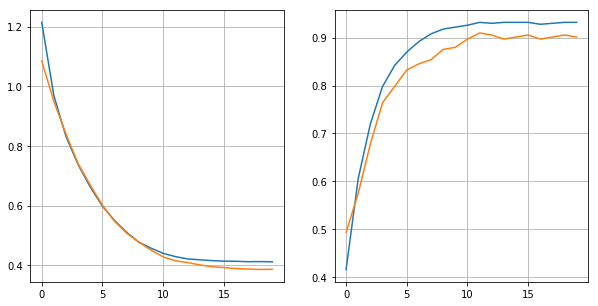

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.subplot(1,2,2)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.grid()

# Optimizing parameters

In [15]:
rates = [0.01,0.001,0.0001]
nhs = [50,300]
loss_hist = []
val_loss_hist = []
val_acc_hist = []
acc_hist = []
par = []
for rate in rates:
    for nh in nhs:
        K.clear_session()
        model = Sequential()
        model = Sequential()
        model.add(Dense(nh,input_shape=(nfea,),name='hidden'))
        model.add(Dense(2,name='output'))
        opt = optimizers.Adam(lr=0.001)
        model.compile(optimizer=opt,
                        loss='mse',
                        metrics=['accuracy'])
        hist = model.fit(Xtr_scale, Ytr_scale, epochs=10, 
                         validation_data=(Xts_scale,Yts_scale),
                         verbose=0)
        loss_hist.append(hist.history['loss'])
        val_loss_hist.append(hist.history['val_loss'])
        acc_hist.append(hist.history['acc'])
        val_acc_hist.append(hist.history['val_acc'])
        par.append([rate,nh])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


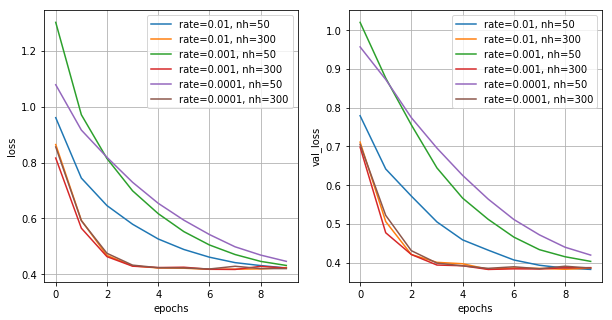

In [16]:
plt.figure(figsize=(10,5))

for i in range(6):
    plt.subplot(1,2,1)
    plt.plot(loss_hist[i],
             label='rate='+str(par[i][0])+', nh='+str(par[i][1]))
    plt.subplot(1,2,2)
    plt.plot(val_loss_hist[i],
             label='rate='+str(par[i][0])+', nh='+str(par[i][1]))
plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.grid()
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


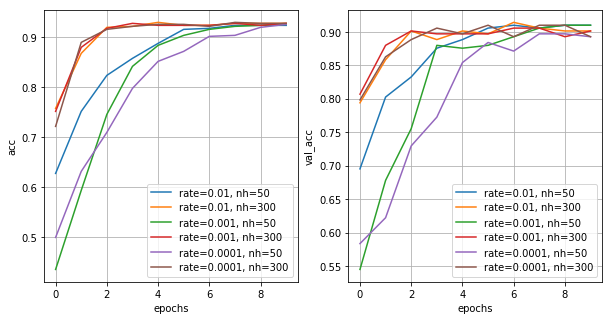

In [17]:
plt.figure(figsize=(10,5))

for i in range(6):
    plt.subplot(1,2,1)
    plt.plot(acc_hist[i],
             label='rate='+str(par[i][0])+', nh='+str(par[i][1]))
    plt.subplot(1,2,2)
    plt.plot(val_acc_hist[i],
             label='rate='+str(par[i][0])+', nh='+str(par[i][1]))
plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('val_acc')
plt.grid()
plt.legend()

In [18]:
for i in range(6):
    print('rate=%.4f,nh=%3.d : loss=%.5f,val_loss=%.5f,acc=%.5f,val_acc=%.5f'\
          %(par[i][0],par[i][1],loss_hist[i][-1],val_loss_hist[i][-1],acc_hist[i][-1],val_acc_hist[i][-1]))

rate=0.0100,nh= 50 : loss=0.42297,val_loss=0.38223,acc=0.92400,val_acc=0.90987
rate=0.0100,nh=300 : loss=0.42450,val_loss=0.38557,acc=0.92800,val_acc=0.90129
rate=0.0010,nh= 50 : loss=0.43196,val_loss=0.40292,acc=0.92600,val_acc=0.90987
rate=0.0010,nh=300 : loss=0.42265,val_loss=0.38676,acc=0.92800,val_acc=0.90129
rate=0.0001,nh= 50 : loss=0.44670,val_loss=0.41916,acc=0.92600,val_acc=0.89270
rate=0.0001,nh=300 : loss=0.42073,val_loss=0.38551,acc=0.92800,val_acc=0.89270
